<a href="https://colab.research.google.com/github/dheeraj-4518/churn-prediction/blob/main/churn_prediction_in_telecomm_industry_Dheeraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px

In [ ]:
telco_data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
telco_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_data.shape

(7043, 21)

In [ ]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
telco_data.notnull().sum()


customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [ ]:
%matplotlib inline

In [ ]:
telco_hist = px.histogram(telco_data, x='gender',color='Churn',marginal='box', color_discrete_sequence = ['red','grey'])
telco_hist.update_layout(bargap=0.2)

<BarContainer object of 7043 artists>

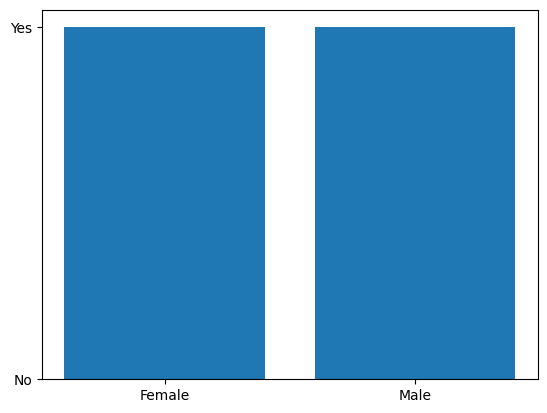

In [ ]:
plt.bar(telco_data['gender'],telco_data['Churn'])

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

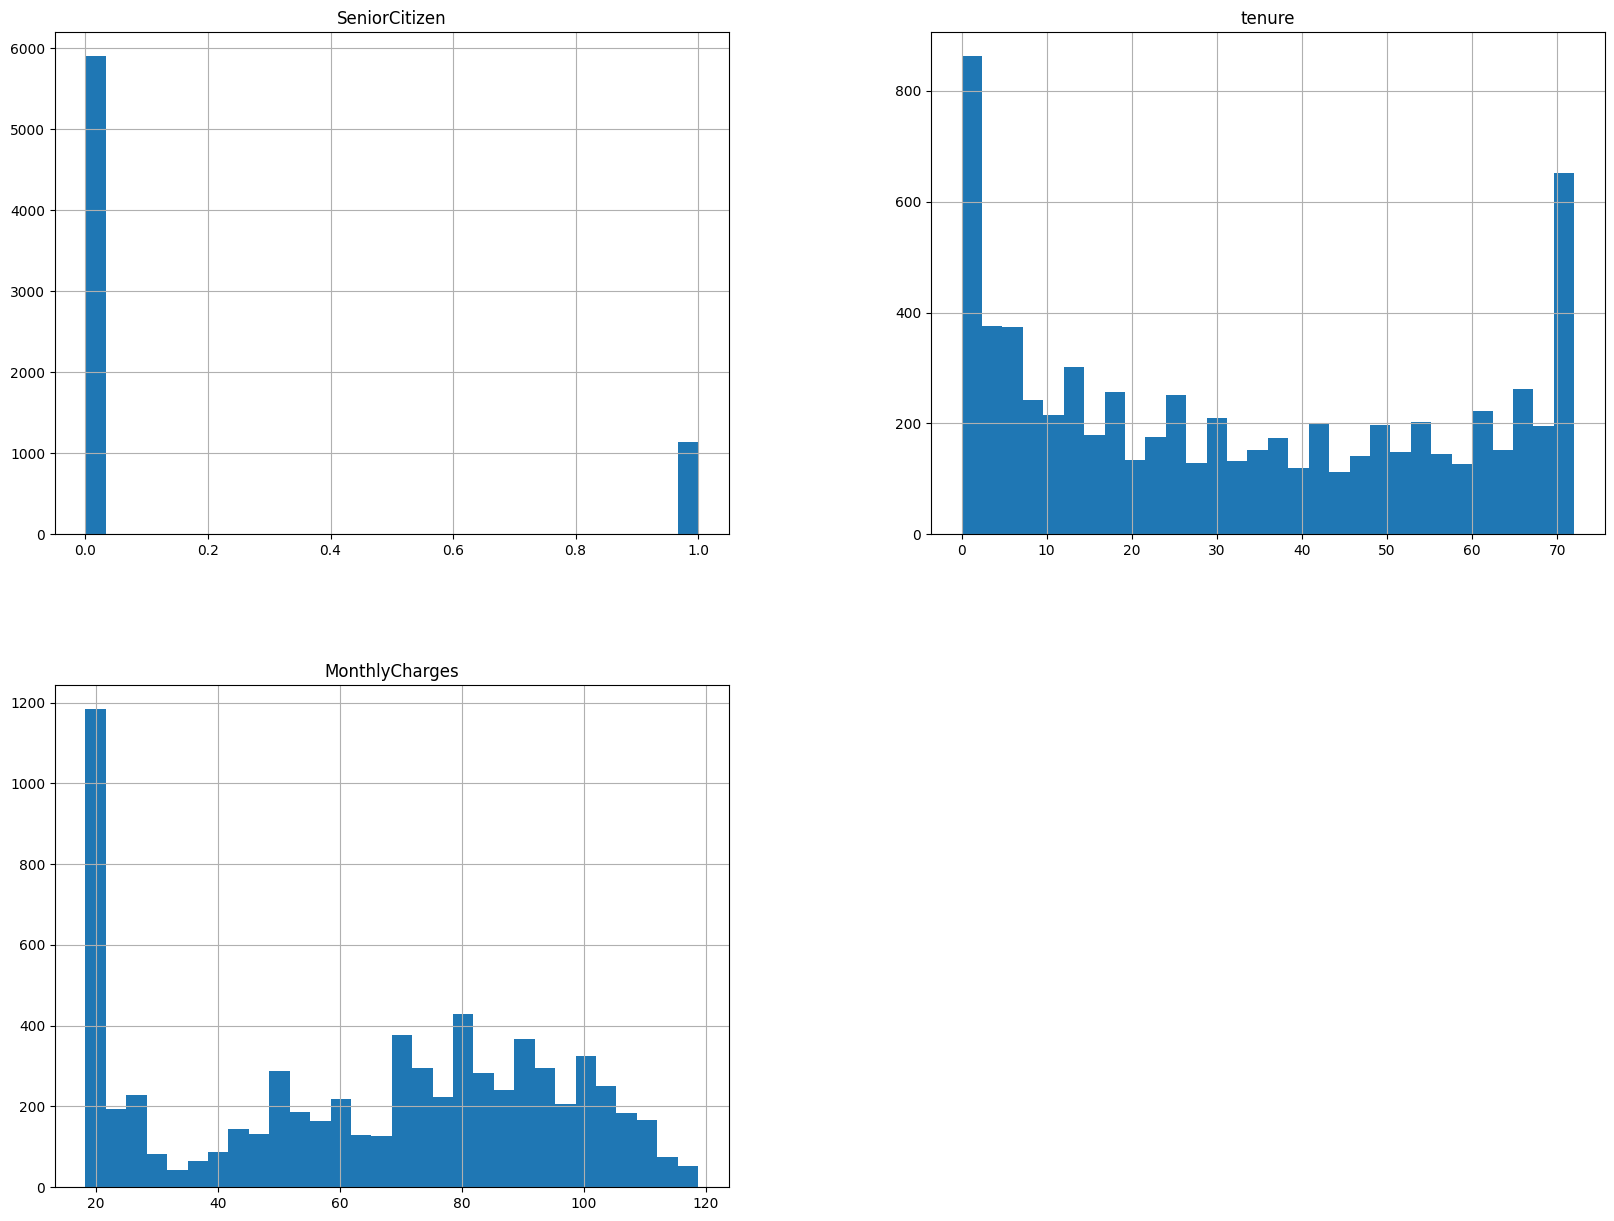

In [ ]:
telco_data.hist(bins = 30, figsize=(20,15))

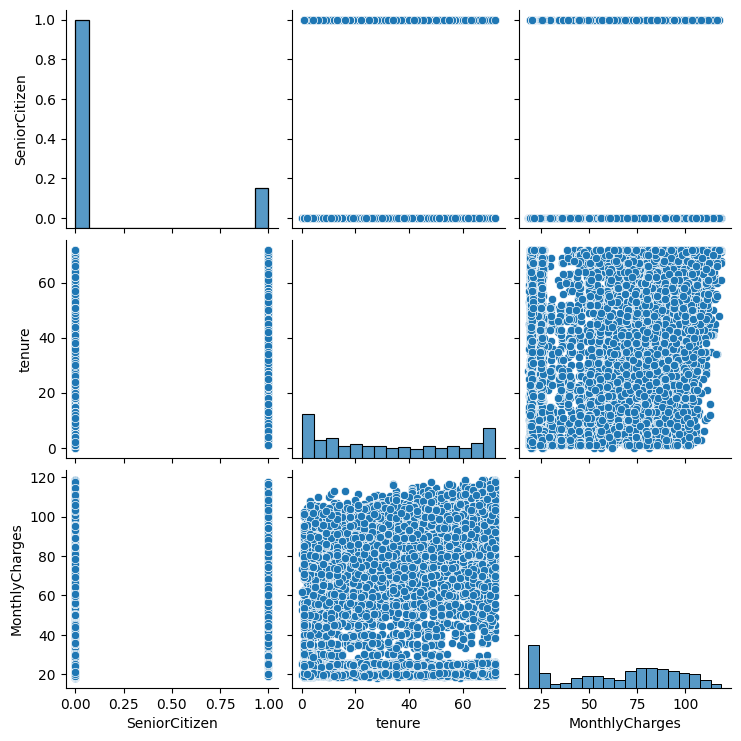

In [ ]:
sns.pairplot(telco_data)

In [ ]:
col = ['gender','customerID','tenure']
telco_data = telco_data.drop(col,axis = 1)

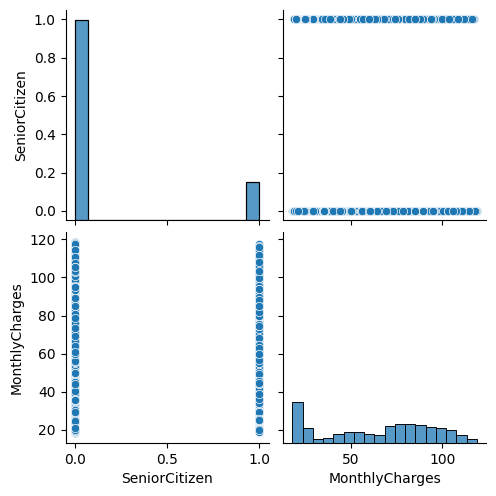

In [ ]:
sns.pairplot(telco_data)

In [ ]:
telco_data.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_data['TotalCharges'].notnull().sum()

7043

In [ ]:
telco_data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
telco_data['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [ ]:
telco_data.notnull().sum()

SeniorCitizen       7043
Partner             7043
Dependents          7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [ ]:
telco_data.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
telco_data['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

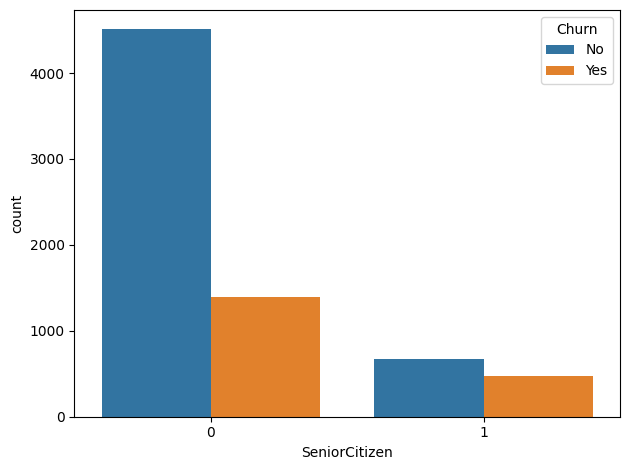

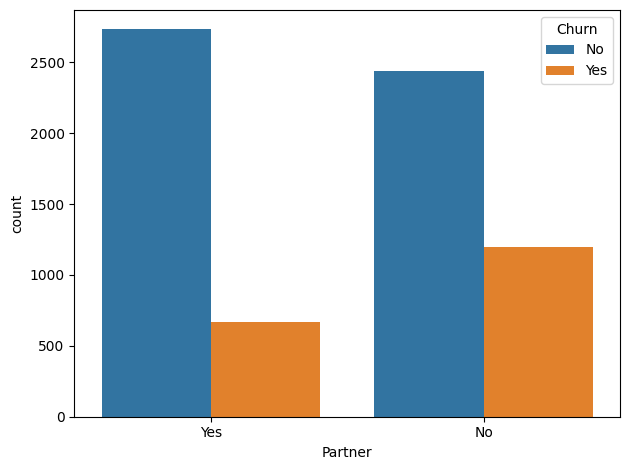

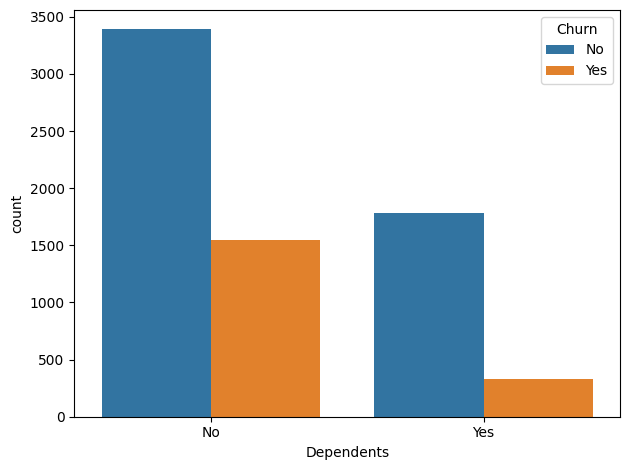

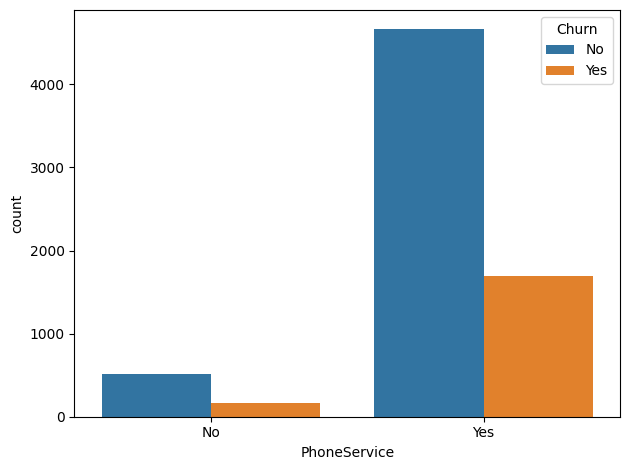

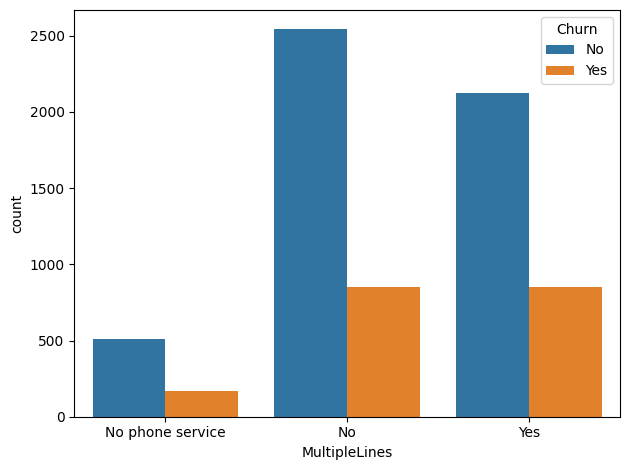

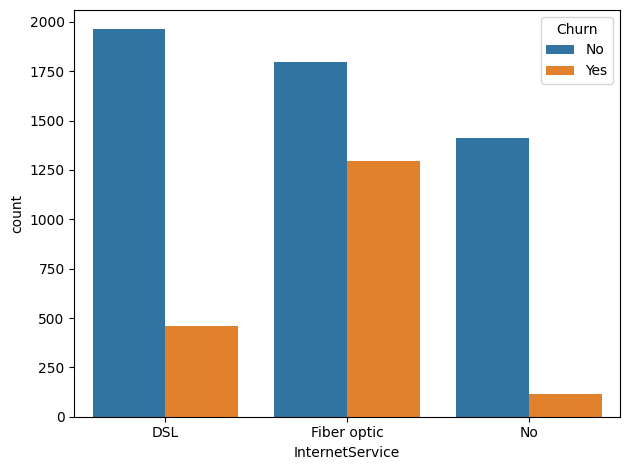

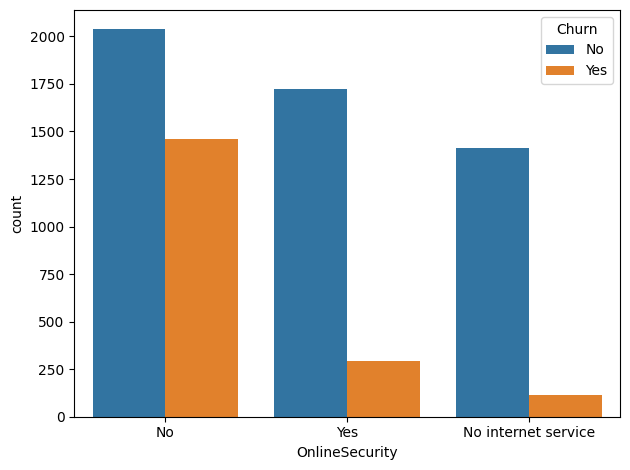

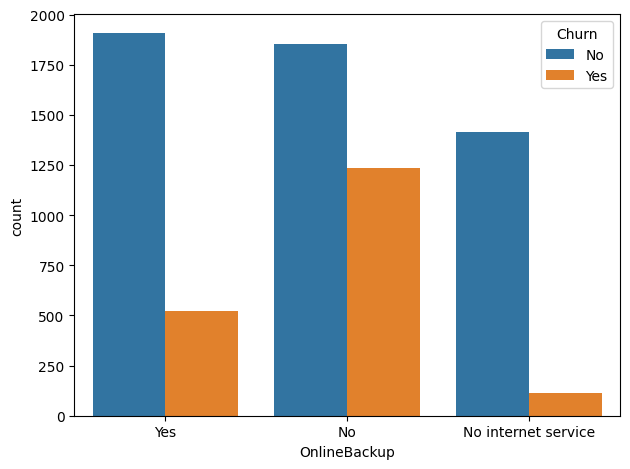

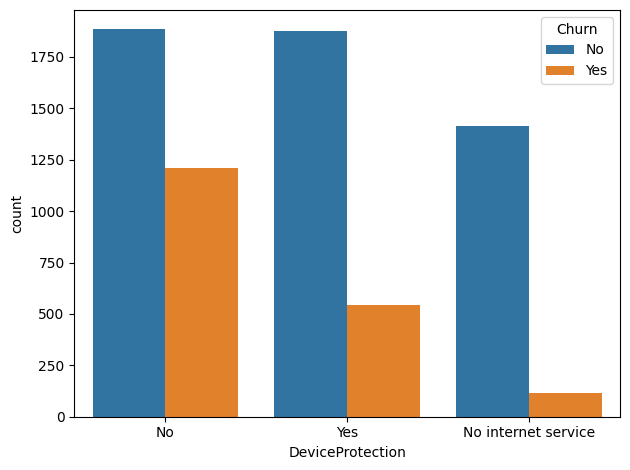

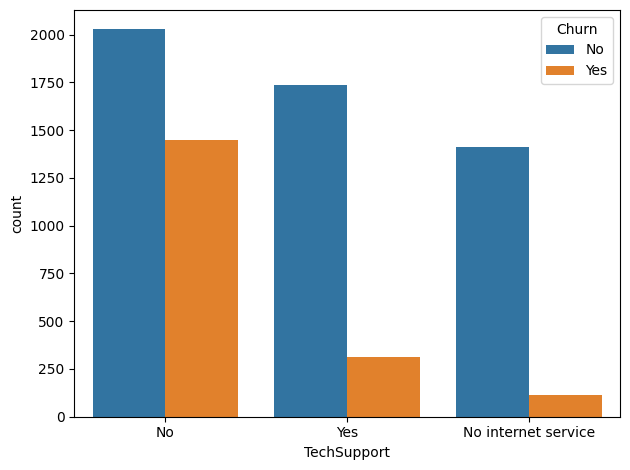

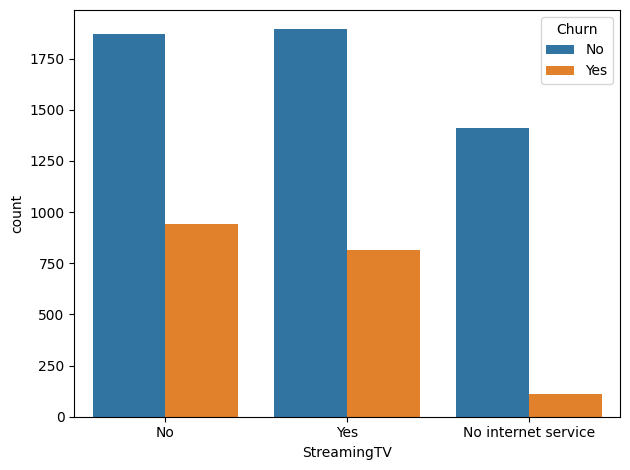

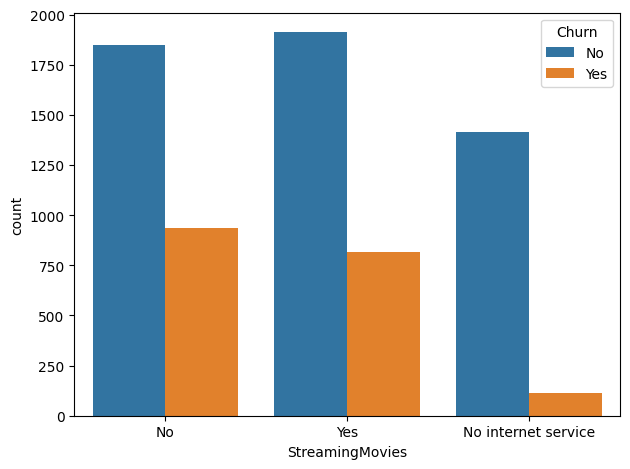

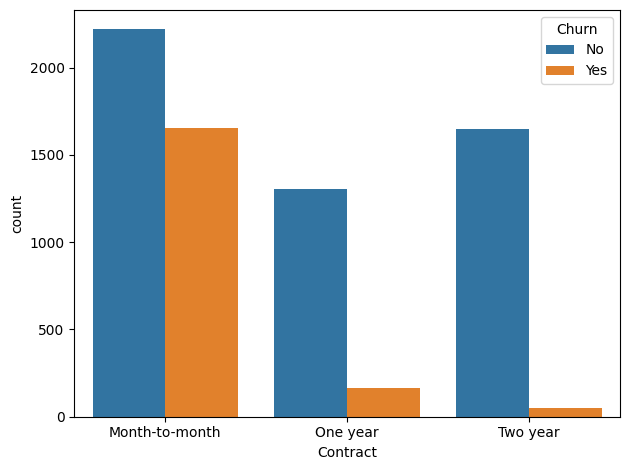

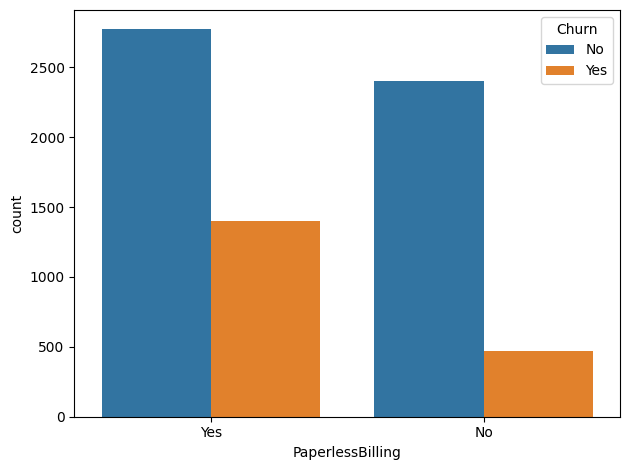

<ipython-input-24-a78436c77e68>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



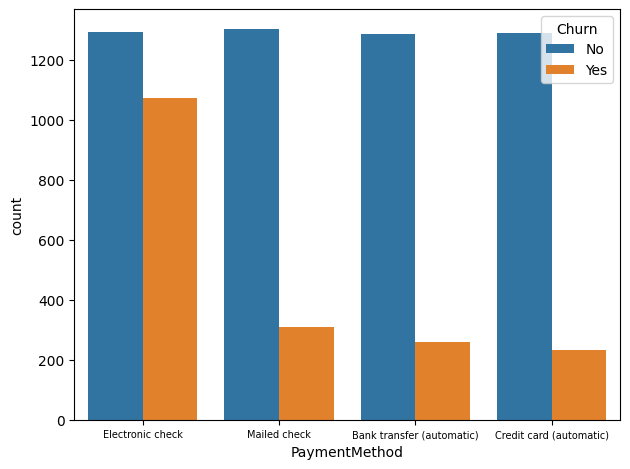

In [ ]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    ax = sns.countplot(data =telco_data, x = predictor, hue='Churn')
    if predictor == "PaymentMethod":
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
        plt.tight_layout()
        plt.show()
    else:
        plt.tight_layout()
        plt.show()

In [ ]:
telco_data["Churn"] = telco_data["Churn"].replace(['Yes','No'],[1,0])

In [ ]:
telco_data

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [ ]:
telco_data_dummies = pd.get_dummies(telco_data)

In [ ]:
telco_data_dummies

,SeniorCitizen,MonthlyCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,29.85,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,56.95,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,53.85,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,42.30,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,70.70,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,103.20,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,29.60,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,74.40,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

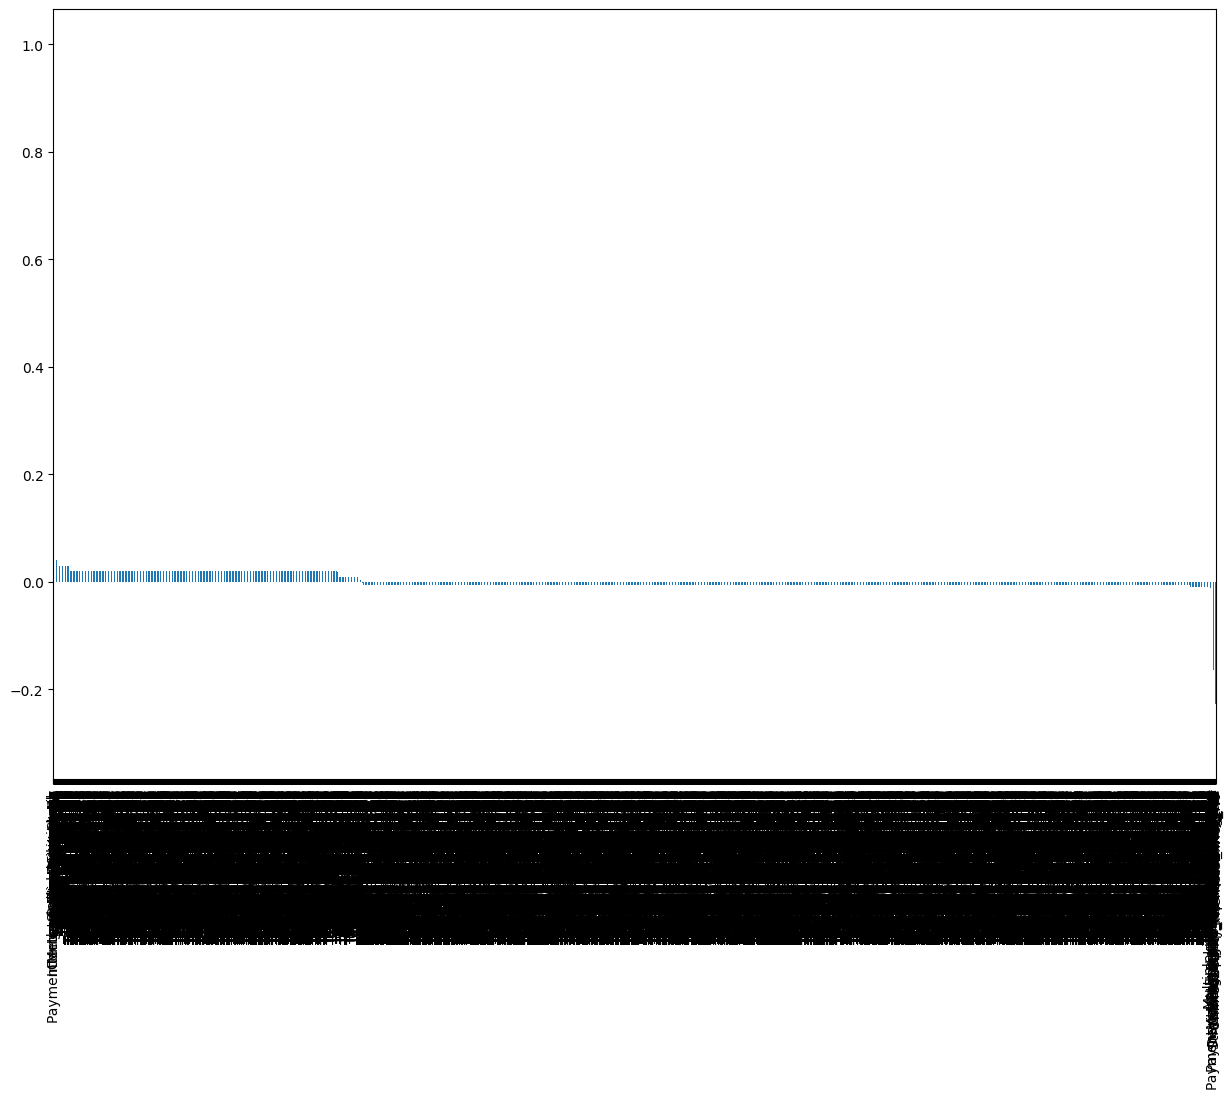

In [ ]:
churn_corr_matrix = telco_data_dummies.corr()
churn_corr_matrix['Churn'].sort_values(ascending = False).plot(kind='bar',figsize = (15,10))

In [ ]:
churn_corr_matrix['Churn'].sort_values(ascending = False)

Churn                                  1.000000
Contract_Month-to-month                0.405103
OnlineSecurity_No                      0.342637
TechSupport_No                         0.337281
InternetService_Fiber optic            0.308020
                                         ...   
OnlineBackup_No internet service      -0.227890
InternetService_No                    -0.227890
StreamingMovies_No internet service   -0.227890
OnlineSecurity_No internet service    -0.227890
Contract_Two year                     -0.302253
Name: Churn, Length: 6573, dtype: float64

In [ ]:
x = telco_data_dummies.drop('Churn',axis = 1)

In [ ]:
x

,SeniorCitizen,MonthlyCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,29.85,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,56.95,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,53.85,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,42.30,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,70.70,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,103.20,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,29.60,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,74.40,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = telco_data_dummies['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
x.shape

(7043, 6572)

In [ ]:
y.shape

(7043,)

In [ ]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
x_resampled_smote, y_resampled_smote = smote.fit_resample(x,y)
y_resampled_smote.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [ ]:
x_resampled_smote

,SeniorCitizen,MonthlyCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,29.850000,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,56.950000,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,53.850000,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,42.300000,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,70.700000,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,86.687604,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10344,0,86.701192,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10345,0,74.366249,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10346,0,88.823677,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_resampled_smote.notnull().sum()

10348

In [ ]:
x_resampled_smote.notnull().sum()

SeniorCitizen          10348
MonthlyCharges         10348
Partner_No             10348
Partner_Yes            10348
Dependents_No          10348
                       ...  
TotalCharges_997.75    10348
TotalCharges_998.1     10348
TotalCharges_999.45    10348
TotalCharges_999.8     10348
TotalCharges_999.9     10348
Length: 6572, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
LogReg = LogisticRegression(solver='lbfgs', max_iter=400)
LogReg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=400)

In [ ]:
y_pred = LogReg.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8048261178140526

In [ ]:
x_smote_train,x_smote_test,y_smote_train,y_smote_test = train_test_split(x_resampled_smote,y_resampled_smote,test_size=0.2,random_state=42)
LogReg.fit(x_smote_train,y_smote_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=400)

In [ ]:
y_smote_pred = LogReg.predict(x_smote_test)
accuracy_score(y_smote_test,y_smote_pred)

0.836231884057971